In [1]:
# Download YOLOv7 code
#!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
from pathlib import Path

import torch

from models.yolo import Model
from utils.general import check_requirements, set_logging
from utils.google_utils import attempt_download
from utils.torch_utils import select_device

dependencies = ['torch', 'yaml']
#check_requirements(Path("C:/Users/Manya Gaur/Capstone/yolov7/requirements.txt").parent / 'requirements.txt', exclude=('pycocotools', 'thop'))
#set_logging()

def custom(path_or_model='path/to/model.pt', autoshape=True):
    """custom mode

    Arguments (3 options):
        path_or_model (str): 'path/to/model.pt'
        path_or_model (dict): torch.load('path/to/model.pt')
        path_or_model (nn.Module): torch.load('path/to/model.pt')['model']

    Returns:
        pytorch model
    """
    model = torch.load(path_or_model, map_location=torch.device('cpu')) if isinstance(path_or_model, str) else path_or_model  # load checkpoint
    if isinstance(model, dict):
        model = model['ema' if model.get('ema') else 'model']  # load model

    hub_model = Model(model.yaml).to(next(model.parameters()).device)  # create
    hub_model.load_state_dict(model.float().state_dict())  # load state_dict
    hub_model.names = model.names  # class names
    if autoshape:
        hub_model = hub_model.autoshape()  # for file/URI/PIL/cv2/np inputs and NMS
    device = select_device('0' if torch.cuda.is_available() else 'cpu')  # default to GPU if available
    return hub_model.to(device)

model_object_detection = custom(path_or_model='C:/Users/Manya Gaur/Downloads/best (6).pt')  # custom example

model_sidewalk_detection = custom(path_or_model='C:/Users/Manya Gaur/Downloads/best (18).pt')
# model = create(name='yolov7', pretrained=True, channels=3, classes=80, autoshape=True)  # pretrained example

# Verify inference
import numpy as np
from PIL import Image
import pandas as pd

#imgs = [np.zeros((640, 480, 3))]
#Object Detection
results_object_detection = model_object_detection("C:/Users/Manya Gaur/Downloads/10000001.jpg")  # batched inference
results_sidewalk_detection = model_sidewalk_detection("C:/Users/Manya Gaur/Downloads/10000001.jpg")
#results.print()
#results.save()
df_prediction_objects = results_object_detection.pandas().xyxy
df_prediction_sidewalk = results_sidewalk_detection.pandas().xyxy
df_prediction_objects
df_prediction=[]
frames = [df_prediction_objects[0], df_prediction_sidewalk[0]]
df_prediction.append(pd.concat(frames,ignore_index=True))
df_prediction

C:\Users\Manya Gaur\Capstone\yolov7
Adding autoShape... 
Adding autoShape... 


C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\Manya Gaur\anaconda3\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[          xmin        ymin        xmax        ymax  confidence  class  \
 0   207.978760    0.000000  325.863281  561.023499    0.623623      0   
 1   170.533508  212.913116  213.373383  606.781494    0.574400     16   
 2   421.222565  362.889862  433.202362  437.535492    0.522803     16   
 3   392.443268  353.616943  404.814117  409.893311    0.473337      0   
 4    51.100334  352.258484  179.451599  425.976257    0.461133      9   
 5    49.933968  396.294373  218.303406  534.368835    0.460423     10   
 6   336.492767  460.276520  480.000000  590.579956    0.452268      3   
 7   469.969299  364.142456  479.108154  386.962402    0.365732      6   
 8    52.795425  349.369873  180.477371  430.388489    0.283276     10   
 9   313.549713  286.066315  342.480194  395.178680    0.273312      0   
 10   49.992531  543.046692  102.705971  587.901550    0.664452      1   
 11   49.090240  594.316345   93.063110  639.368469    0.519676      0   
 12  299.718292  448.644775  471.00119

10


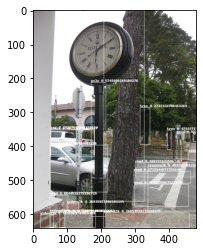

<Figure size 432x288 with 0 Axes>

In [2]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import tkinter
%matplotlib inline

def plot_bounding_box(image, annotation_list_objects,annotation_list_sidewalk):
    #annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)
    print(len(annotation_list_objects))
    for i in range(len(annotation_list_objects)):
        x0 = annotation_list_objects.loc[i,"xmin"]
        y0 = annotation_list_objects.loc[i,"ymin"]
        x1 = annotation_list_objects.loc[i,"xmax"]
        y1 = annotation_list_objects.loc[i,"ymax"]
        conf = annotation_list_objects.loc[i,"confidence"]
        cls_no = annotation_list_objects.loc[i,"class"]
        obj_cls = annotation_list_objects.loc[i,"name"]
        
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), obj_cls+" "+str(conf))
        
    for i in range(len(annotation_list_sidewalk)):
        x0 = annotation_list_sidewalk.loc[i,"xmin"]
        y0 = annotation_list_sidewalk.loc[i,"ymin"]
        x1 = annotation_list_sidewalk.loc[i,"xmax"]
        y1 = annotation_list_sidewalk.loc[i,"ymax"]
        conf = annotation_list_sidewalk.loc[i,"confidence"]
        cls_no = annotation_list_sidewalk.loc[i,"class"]
        obj_cls = annotation_list_sidewalk.loc[i,"name"]
        
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), obj_cls+" "+str(conf))
    
    plt.imshow(np.array(image))
    plt.show()
    plt.savefig('myplot.png')
    


#Get the corresponding image file
image_file = "C:/Users/Manya Gaur/Downloads/10000001.jpg"
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, df_prediction_objects[0], df_prediction_sidewalk[0])

10


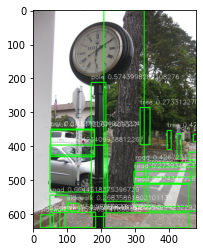

In [3]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import tkinter
import cv2
%matplotlib inline

def plot_bounding_box(image_annot, annotation_list_objects,annotation_list_sidewalk):
    #annotations = np.array(annotation_list)
    h = image_annot.shape[0]
    w = image_annot.shape[1]
    
    print(len(annotation_list_objects))
    for i in range(len(annotation_list_objects)):
        x0 = annotation_list_objects.loc[i,"xmin"]
        y0 = annotation_list_objects.loc[i,"ymin"]
        x1 = annotation_list_objects.loc[i,"xmax"]
        y1 = annotation_list_objects.loc[i,"ymax"]
        conf = annotation_list_objects.loc[i,"confidence"]
        cls_no = annotation_list_objects.loc[i,"class"]
        obj_cls = annotation_list_objects.loc[i,"name"]
        
        start_point = (int(x0), int(y0))
        end_point = (int(x1), int(y1))
        cv2.rectangle(image_annot, start_point, end_point, color=(0,255,0), thickness=2)
        
        cv2.putText(image_annot, obj_cls+" "+str(conf), (int(x0), int(y0 -10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
        
    for i in range(len(annotation_list_sidewalk)):
        x0 = annotation_list_sidewalk.loc[i,"xmin"]
        y0 = annotation_list_sidewalk.loc[i,"ymin"]
        x1 = annotation_list_sidewalk.loc[i,"xmax"]
        y1 = annotation_list_sidewalk.loc[i,"ymax"]
        conf = annotation_list_sidewalk.loc[i,"confidence"]
        cls_no = annotation_list_sidewalk.loc[i,"class"]
        obj_cls = annotation_list_sidewalk.loc[i,"name"]
        
        start_point = (int(x0), int(y0))
        end_point = (int(x1), int(y1))
        cv2.rectangle(image_annot, start_point, end_point, color=(0,255,0), thickness=2)
        
        cv2.putText(image_annot, obj_cls+" "+str(conf), (int(x0), int(y0 - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
    
    
    


#Get the corresponding image file
image_file = "C:/Users/Manya Gaur/Downloads/10000001.jpg"
assert os.path.exists(image_file)

#Load the image
image = cv2.imread(image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imshow('original image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

image_annot=image.copy()

#Plot the Bounding Box
plot_bounding_box(image_annot, df_prediction_objects[0], df_prediction_sidewalk[0])
cv2.imshow('annotated image',image_annot)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(image_annot)
plt.show()

 #annotation_list=pd.concat([objects,sidewalk],axis=0,join='inner',ignore_index=True)

544.0
         xmin        ymin        xmax        ymax  confidence  class      name
0  206.283905  595.490479  457.164215  639.829712     0.26055      0  sidewalk
         xmin        ymin        xmax        ymax  confidence  class  name
0  207.978760    0.000000  325.863281  561.023499    0.623623      0  tree
1  170.533508  212.913116  213.373383  606.781494    0.574400     16  pole
2   49.992531  543.046692  102.705971  587.901550    0.664452      1  road
3  297.298157  511.978638  455.776062  576.452637    0.424348      1  road
         xmin        ymin        xmax        ymax  confidence  class      name
0   49.090240  594.316345   93.063110  639.368469    0.519676      0  sidewalk
1   21.826241  601.717224   60.109612  638.344543    0.315997      0  sidewalk
2   78.548813  594.811768  183.841599  638.752441    0.280806      0  sidewalk
3  206.283905  595.490479  457.164215  639.829712    0.260550      0  sidewalk
4


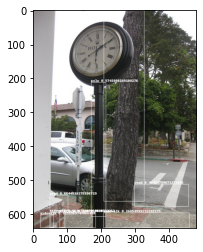

slightly right


In [4]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import tkinter
%matplotlib inline

def plot_bounding_box(image, annotation_list_objects,annotation_list_sidewalk):
    #annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)
    print(len(annotation_list_objects))
    for i in range(len(annotation_list_objects)):
        x0 = annotation_list_objects.loc[i,"xmin"]
        y0 = annotation_list_objects.loc[i,"ymin"]
        x1 = annotation_list_objects.loc[i,"xmax"]
        y1 = annotation_list_objects.loc[i,"ymax"]
        conf = annotation_list_objects.loc[i,"confidence"]
        cls_no = annotation_list_objects.loc[i,"class"]
        obj_cls = annotation_list_objects.loc[i,"name"]
        
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), obj_cls+" "+str(conf))
        
    for i in range(len(annotation_list_sidewalk)):
        x0 = annotation_list_sidewalk.loc[i,"xmin"]
        y0 = annotation_list_sidewalk.loc[i,"ymin"]
        x1 = annotation_list_sidewalk.loc[i,"xmax"]
        y1 = annotation_list_sidewalk.loc[i,"ymax"]
        conf = annotation_list_sidewalk.loc[i,"confidence"]
        cls_no = annotation_list_sidewalk.loc[i,"class"]
        obj_cls = annotation_list_sidewalk.loc[i,"name"]
        
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), obj_cls+" "+str(conf))
    
    plt.imshow(np.array(image))
    plt.show()
    
obstacles = pd.DataFrame()   
walkable = pd.DataFrame()
def direction(image_size, objects, sidewalk):
    
    width,height=image_size
    ratio = float(0.85)
    ref_y = ratio * height
    print(ref_y)
    
    obstacles = pd.concat([objects, sidewalk.loc[sidewalk['name']=='road']], ignore_index=True)
    obstacles = pd.concat([obstacles.loc[obstacles['ymax'] >= ref_y]], ignore_index = True)
    obstacles = pd.concat([obstacles.loc[obstacles['name'] != 'crosswalk']], ignore_index = True)
    walkable = pd.concat([objects.loc[objects['name']=='crosswalk'], sidewalk.loc[sidewalk['name']=='sidewalk']], ignore_index=True)
    walkable = pd.concat([walkable.loc[walkable['ymax'] >= ref_y]], ignore_index = True)
    walkable=pd.concat([walkable.loc[walkable['ymax'] >= walkable['ymax'].max()-5.0]],ignore_index = True)
    df2=pd.concat([walkable.loc[walkable['ymax'] >= walkable['ymax'].max()-5.0]],ignore_index = True)
    df2 = pd.concat([walkable.loc[(walkable['xmax'] - walkable['xmin']) == (walkable['xmax'] - walkable['xmin']).max()]],ignore_index = True)
    
    #Choosing the direction
    id_walk = 0
    mid = height/2
    dist = 0
    min_dist = 0
    dirn = ""
    
    for i in range(len(df2)):
        x0 = df2.loc[i,'xmin']
        x1 = df2.loc[i,'xmax']
        
        if x0<= mid and x1>= mid:
            dirn = "straight"
            if mid - x0 < 0.25*width:
                dirn = "slightly right"
            elif x1 - mid < 0.25*width:
                dirn = "slightly left"
            id_walk = i
            break;
        elif x0 > mid:
            dist = x0 - mid
            if min_dist > dist:
                min_dist = dist
                id_walk = i
                dirn = "right"
        elif x1 < mid:
            dist = mid - x1
            if min_dist > dist:
                min_dist = dist
                id_walk = i 
                dirn = "left"
                

    if min_dist < 0.25 * width and len(dirn)<5:
        dirn = "slightly " + dirn
        
    print(df2)
    print(obstacles)
    print(walkable)
    return dirn,obstacles, walkable

#Get the corresponding image file
image_file = "C:/Users/Manya Gaur/Downloads/10000001.jpg"

assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
#plot_bounding_box1(image, df_prediction[0])



#get direction to be moved in
dirn,obstacles, walkable = direction(image.size, df_prediction_objects[0], df_prediction_sidewalk[0])
plot_bounding_box(image, obstacles, walkable)
print(dirn)

544.0
         xmin        ymin        xmax        ymax  confidence  class      name
0  206.283905  595.490479  457.164215  639.829712     0.26055      0  sidewalk
         xmin        ymin        xmax        ymax  confidence  class  name
0  207.978760    0.000000  325.863281  561.023499    0.623623      0  tree
1  170.533508  212.913116  213.373383  606.781494    0.574400     16  pole
2   49.992531  543.046692  102.705971  587.901550    0.664452      1  road
3  297.298157  511.978638  455.776062  576.452637    0.424348      1  road
         xmin        ymin        xmax        ymax  confidence  class      name
0   49.090240  594.316345   93.063110  639.368469    0.519676      0  sidewalk
1   21.826241  601.717224   60.109612  638.344543    0.315997      0  sidewalk
2   78.548813  594.811768  183.841599  638.752441    0.280806      0  sidewalk
3  206.283905  595.490479  457.164215  639.829712    0.260550      0  sidewalk
4
slightly right


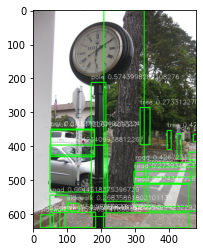

In [13]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import tkinter
%matplotlib inline

def plot_bounding_box1(image_annot, annotation_list):
    #annotations = np.array(annotation_list)
    h = image_annot.shape[0]
    w = image_annot.shape[1]
    print(w,h)
    #annotation_list=pd.concat([objects,sidewalk],axis=0,join='inner',ignore_index=True)
    
    print(len(annotation_list))
    int 
    for i in range(len(annotation_list)):
        x0 = annotation_list.loc[i,"xmin"]
        y0 = annotation_list.loc[i,"ymin"]
        x1 = annotation_list.loc[i,"xmax"]
        y1 = annotation_list.loc[i,"ymax"]
        conf = annotation_list.loc[i,"confidence"]
        cls_no = annotation_list.loc[i,"class"]
        obj_cls = annotation_list.loc[i,"name"]
        
        start_point = (int(x0), int(y0))
        end_point = (int(x1), int(y1))
        cv2.rectangle(image_annot, start_point, end_point, color=(0,255,0), thickness=2)
        
        cv2.putText(image_annot, obj_cls+" "+str(conf), (int(x0), int(y0 - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
    

obstacles = pd.DataFrame()   
walkable = pd.DataFrame()
def direction(width,height, objects, sidewalk):
    
    
    ratio = float(0.85)
    ref_y = ratio * height
    print(ref_y)
    
    obstacles = pd.concat([objects, sidewalk.loc[sidewalk['name']=='road']], ignore_index=True)
    obstacles = pd.concat([obstacles.loc[obstacles['ymax'] >= ref_y]], ignore_index = True)
    obstacles = pd.concat([obstacles.loc[obstacles['name'] != 'crosswalk']], ignore_index = True)
    walkable = pd.concat([objects.loc[objects['name']=='crosswalk'], sidewalk.loc[sidewalk['name']=='sidewalk']], ignore_index=True)
    walkable = pd.concat([walkable.loc[walkable['ymax'] >= ref_y]], ignore_index = True)
    walkable=pd.concat([walkable.loc[walkable['ymax'] >= walkable['ymax'].max()-5.0]],ignore_index = True)
    df2=pd.concat([walkable.loc[walkable['ymax'] >= walkable['ymax'].max()-5.0]],ignore_index = True)
    df2 = pd.concat([walkable.loc[(walkable['xmax'] - walkable['xmin']) == (walkable['xmax'] - walkable['xmin']).max()]],ignore_index = True)
    
    #Choosing the direction
    id_walk = 0
    mid = height/2
    dist = 0
    min_dist = 0
    dirn = ""
    
    for i in range(len(df2)):
        x0 = df2.loc[i,'xmin']
        x1 = df2.loc[i,'xmax']
        
        if x0<= mid and x1>= mid:
            dirn = "straight"
            if mid - x0 < 0.25*width:
                dirn = "slightly right"
            elif x1 - mid < 0.25*width:
                dirn = "slightly left"
            id_walk = i
            break;
        elif x0 > mid:
            dist = x0 - mid
            if min_dist > dist:
                min_dist = dist
                id_walk = i
                dirn = "right"
        elif x1 < mid:
            dist = mid - x1
            if min_dist > dist:
                min_dist = dist
                id_walk = i 
                dirn = "left"
                

    if min_dist < 0.25 * width and len(dirn)<5:
        dirn = "slightly " + dirn
        
    print(df2)
    print(obstacles)
    print(walkable)
    return dirn,obstacles, walkable

#Get the corresponding image file
image_file = "C:/Users/Manya Gaur/Downloads/10000001.jpg"

assert os.path.exists(image_file)

#Load the image
image = cv2.imread(image_file)

#Plot the Bounding Box
#plot_bounding_box1(image, df_prediction[0])



#get direction to be moved in
dirn,obstacles, walkable = direction(image.shape[1],image.shape[0], df_prediction_objects[0], df_prediction_sidewalk[0])
plot_bounding_box(image, obstacles, walkable)
print(dirn)

cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(image_annot)
plt.show()

In [10]:
import pyttsx3

# It is a text value that we want to convert to audio  
list_obstacles = []
text_val = "" 
for i in range(len(obstacles)):
    obstacle = obstacles.loc[i,'name']
    
    if obstacle not in list_obstacles:
        list_obstacles.append(obstacle)
        text_val = text_val + obstacle + ", "
text_val = text_val[:len(text_val)-2] + " ahead, go "+ dirn
print(list_obstacles)
print(text_val)


engine = pyttsx3.init()
engine.setProperty("rate", 175)
engine.say(text_val)
engine.runAndWait()

['tree', 'pole', 'road']
tree, pole, road ahead, go slightly right


In [ ]:
'''
# Import the gTTS module for text  
# to speech conversion  
from gtts import gTTS 
import time
  
# This module is imported so that we can  
# play the converted audio  
  
from playsound import playsound  
  
# It is a text value that we want to convert to audio  
list_obstacles = []
text_val = "" 
for i in range(len(obstacles)):
    obstacle = obstacles.loc[i,'name']
    
    if obstacle not in list_obstacles:
        list_obstacles.append(obstacle)
        text_val = text_val + obstacle + " "
text_val = text_val + "ahead go "+ dirn
print(list_obstacles)
print(text_val)
  
# Here are converting in English Language  
language = 'en'  
  
# Passing the text and language to the engine,  
# here we have assign slow=False. Which denotes  
# the module that the transformed audio should  
# have a high speed  
obj = gTTS(text=text_val, lang=language, slow=False)  
  
#Here we are saving the transformed audio in a mp3 file named  
# exam.mp3
if os.path.exists("exam.mp3"):
    os.remove('exam.mp3')
obj.save("exam.mp3")  
  
# Play the exam.mp3 file
playsound("exam.mp3") 
'''